In [1]:
from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Toggle Code"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def toggle_code():
    display(HTML(toggle_code_str))

C:\Users\rahul gupta\AppData\Local\Temp\ipykernel_11820\445671811.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## How to build baseline regression model?

DummyRegressor helps in creating a baseline for regression.

In [3]:
from sklearn.dummy import DummyRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


x,y = fetch_california_housing(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.2)
dummy_regr = DummyRegressor(strategy='mean')


dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_test, y_test)

-0.00021908714592466794

- It makes a prediction as specified by the strategy
- Strategy is based on some statistical property of the training set or user specified value.

Strategy: 
   - mean
   - median
   - quantile (after specifying `quantile as strategy parameter value`, you have to provide value for `quantile` parameter as well)
   - constant (after specifying `constant as strategy parameter value`, you have to provide value for `constant` parameter as well)



### How is Linear Regression model trained ?

Step 1: Instantiate object of a suitable line

one of the following two options
1. Normal Equation
2. Iterative Optimization
 

#### Normal Equation

In [4]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

#### Iterative Optimation  

In [5]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor()

Step 2: Call fit method on linear regression object with training feature matrix and label tor as arguments

In [6]:
linear_regressor.fit(X_train, y_train)

# Works for both single and multi-output regression.

SGDRegressor()

## SGDRegressor

- Implements stochastic gradient descent

- Use for **large training set up (> 10k samples)**

- Provides greater control on optimization process through provision for hyperparameter settings.

> SGDREGRESSOR has a number of various hyperparameter settings for better optimization: 
1. loss (method to calculate loss function
    - loss= ‘squared error’ 
    - loss = ‘huber' (this is used to tackle outliers in data)

<br>

2. penalty
    - penalty = 'l1'
    - penalty = ‘12'
    - penalty = ‘elasticnet'

<br>

3. Learning Rate (After calculating the gradient of loss function wrt intercept,slope we calculate step size which includes `gradient value * Learning Rate` to obtain new intercepts and slopes for next iteration
    - learning_rate = ‘constant’
    - learning rate = ‘optimal’
    - learning rate = ‘invscaling'
    - learning rate = ‘adaptive’

<br>

4. early_stopping (to ensure that iterations stop early)
	-  early_stopping = ‘True’
    - early_stopping = ‘False’
    
**It's a good idea to use a random seed of your choice while instantiating SGDRegressor object. It helps us get reproducible results.**

**Set random_state to seed of your choice.**

In [7]:
from sklearn.linear_model import SGDRegressor

linear_regressor = SGDRegressor(random_state=42) 

#### How to perform feature scaling for SGDRegressor?

> SGD is sensitive to feature scaling so it is highly recommended to scale input feature matrix.

In [8]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
sgd = Pipeline([('scaler', StandardScaler()),
('sgd' , SGDRegressor())])

sgd.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('sgd', SGDRegressor())])

#### How to shuffle training data after each epoch in SGDRegressor?

In [9]:
linear_regressor = SGDRegressor(shuffle=True)

#### How to use set learning rate?

Learning Rate (After calculating the gradient of loss function wrt intercept,slope we calculate step size which includes gradient value * Learning Rate to obtain new intercepts and slopes for next iteration
- learning_rate = ‘constant’
- learning_rate = ‘optimal’
- learning_rate = ‘invscaling'
- learning_rate = ‘adaptive’

In [10]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(learning_rate='invscaling',eta0 = 1e-2)

**The Default setting is `learning_rate = ‘invscaling'  eta0 = 1e-2 (i.e 0.01)   power_t = 0.25`
	- Learning Rate reduces after every iteration : eta = eta0/pow(t,power_t)**
    
Note : You can make changes to these parameters to speed up or slow down the training process.

#### How to use set constant learning rate?
`learning_rate = 'constant'`

In [11]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(learning_rate='constant',eta0=1e-2)

Constant learning rate `eta0=1e-2`used throughout the training.

#### How to set adaptive learning rate?

In [12]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(learning_rate='adaptive',eta0=1e-2)

- The learning rate is kept to initial value as long as the training loss decreases.

- When the stopping criterion is reached, the learning rate is divided by 5, and the training loop continues.

- The algorithm stops when the learning rate goes below 10<sup>-6</sup>.


#### How to set #epochs in SGDRegreesor?

> Set max_iter to desired #epochs. The default value is 1000.

In [13]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(max_iter=100)

Remember one epoch is one full pass over the training data.

>Practical tip : 
SGD converges after observing approximately 10<sup>6</sup> training samples.
Thus, a reasonable first guess for the number of iterations for n
sampled training set is

>**max_iter = np.ceil(10<sup>6</sup>/n)**

 


#### How to set stopping criteria in SGDRegressor?

##### Option 1: `tol`,`n_iter_no_change`,`max_iter`


In [14]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(loss= 'squared_error',
                                max_iter=500,
                                tol = 1e-3,
                                n_iter_no_change=5
                               )

The SGDRegreesor stops

1. when the training loss does not improve `(loss > best_loss - to1)` **for n_iter_no_change consecutive epochs.**

2. else after a maximum number of iteration ,ie.  >= max_iter.


##### Option 2: `early_stopping`, `validation_fraction`

In [15]:
from sklearn.linear_model import SGDRegressor
linear_regressor = SGDRegressor(loss= 'squared_error',
                                early_stopping=True,
                                max_iter=500,
                                tol = 1e-3,
                                validation_fraction = 0.2,
                                n_iter_no_change=5
                               )

Set aside `validation_fraction` percentage records from training set as validation set. Use score method to obtain validation score.

The SGDRegreesor stops when : 

1. validation score does not improve by at least `tol` for `n_iter_no_change` Consecutive epochs.
2. else after a maximum number of iteration max_iter.


#### How to use averaged SGD?

>Averaged SGD updates the weight vector to average of weights from previous updates.

##### Option #1: Averaging across all updates `average=True`

In [16]:
from sklearn.linear_model import SGDRegressor

linear_regressor = SGDRegressor(average=True)


##### Option #1: Set average to integer value `average=10`

Averaging begings once the total number of samples seen reaches the average value.

Setting `average = 10` will start averaging after seeing 10 samples

In [17]:
from sklearn.linear_model import SGDRegressor

linear_regressor = SGDRegressor(average=10)

Averaged SGD works *best* with a `larger number of features` and `high eta0` 

### How do we initialize with weight vector of the previous run?

set `warm_start = True` while instantiating SGDRegressor object

In [18]:
linear_regressor = SGDRegressor(warm_start=True)

#By default, the value is `False`

#### How do we monitor SGD loss iteration after iteration ?
Make use of `warm_start = True`

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error
sgd_reg = SGDRegressor(max_iter=1,penalty=None,tol = 0,warm_start=True,learning_rate='constant',eta0 = 0.0005)

# We have deliberately set max_iter to 1 here so that we can refit the model in a loop 
# to understand the loss after every iteration

for epoch in range(1000):
    sgd_reg.fit(X_train,y_train)
    y_val_predicted = sgd_reg.predict(X_train)
    val_error = mean_squared_error(y_train,y_val_predicted)
    print(val_error)


C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

4.354399344993717e+29
4.073353634349077e+30
5.165872588040095e+28
7.846795656319307e+27
1.296961870134921e+28
1.5256354878471243e+29
2.5909031632196208e+29
4.0855717181643046e+29
1.9030218757080184e+29
2.3602081694324875e+29
3.655269165220183e+29
1.828236812994594e+29
1.0188988514301393e+27
1.539028228647333e+29
4.993255127856977e+28
1.1013756154514075e+28
1.0329414907822046e+30
2.761457659275202e+29
6.683107290240358e+30
2.3285107744065895e+30
5.692767544892254e+29
2.4594968673130814e+29
4.614719507155787e+28
3.4891436660583944e+29
3.2959145373072905e+29
3.5247273728011333e+28
2.1464837740719924e+29
2.967883265901231e+28
1.6615160724507525e+29
2.265741755032914e+30
3.6679540465125236e+27
4.327778248827663e+29
9.271449709391115e+28
6.632513565757456e+29
2.094829564202596e+29
2.464430617564812e+30
2.699299938726483e+30
1.6733909180570277e+28
2.4855896451444153e+29
2.8257103983735157e+30
9.298683927600074e+29
4.0210233263820654e+29
1.1200849863711207e+30
8.556259839563749e+29
1.537166069

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

3.723085443858271e+30
2.167711089271695e+29
3.7492994127678236e+29
5.702536777242038e+30
1.8267528936124906e+28
7.832704476609714e+29
3.8391300061318567e+28
6.018758655135493e+29
9.666027248553466e+28
1.7442233646791245e+30
9.52622614143028e+29
3.5670733346630436e+30
1.1020787858411492e+28
8.001513187694952e+28
6.548959440481266e+27
1.4902190695702895e+30
3.9330559843719434e+29
6.009011660756789e+30
2.275160523471824e+31
2.1750360969215369e+27
2.0348486091356658e+29
1.1552504420656967e+29
9.053764803428586e+29
1.3329437531327233e+30
1.7577194642928964e+28
1.601346490781957e+31
2.203851902404487e+29
2.3773592832661483e+28
1.1947370052255051e+30
2.2601076455389847e+30
2.7711037440581614e+28
7.72586595726279e+27
6.1353879498508545e+29
6.520347570025763e+26
3.603697233309821e+29
7.826280911702356e+29
1.1636933029133398e+28
4.639560904126645e+29
2.9068050149869314e+29
1.657583634319446e+29
4.574336052049232e+29
2.3952829675048705e+28
4.536034103799613e+29
7.302199083539243e+31
1.23652472044

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

1.7355635642109423e+29
1.3171683538054908e+29
1.6887623012381049e+28
1.7538306289606872e+28
5.933259835613769e+27
2.9069240652754074e+28
1.051462861915226e+31
6.183242523454284e+28
1.1290562413533099e+29
4.912917336116577e+30
1.5286398686230077e+30
9.843738527971509e+28
1.392218665702583e+30
1.0961402756126395e+29
8.75030727262517e+28
1.5677073426109103e+29
1.1032116587382446e+29
2.462028900613711e+28
2.751069523921638e+29
1.748874634718992e+30
1.787513894702402e+30
9.633858934871568e+28
4.687305840902134e+26
1.4353918772876038e+30
1.230114966384528e+29
5.106655377127635e+31
2.5080782129123208e+28
7.314519818592303e+26
2.7969867557520117e+29
2.6534872630425552e+29
5.439434449345837e+28
8.515264096341923e+29
3.311320072410487e+30
1.8053201028055525e+30
2.9690992291565167e+29
4.611523989418825e+29
8.297871142881962e+28
6.1227093955669525e+28
3.4619558055423326e+30
5.436480570320459e+28
1.1651205572110538e+29
1.4063657580842404e+29
6.673584910431602e+30
3.3001949224167405e+30
4.7233567570

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

2.3207476193221486e+30
6.518196265587642e+28
1.6650238633024635e+31
1.5632904231694403e+30
2.8484256233883496e+29
3.4046592820865773e+28
7.470140712434079e+29
1.9310276641090182e+30
6.560628310748466e+28
1.538405899198302e+28
1.6757610446152855e+28
8.533570174154286e+30
1.767002804980614e+29
2.8726800604230136e+30
7.069265486717862e+29
5.460948494249113e+29
3.9012984415623844e+27
7.481170457316098e+29
3.9232516974341224e+28
8.010339208211386e+29
2.675524240908441e+30
1.518694502922225e+30
1.6299852053882906e+31
2.19120263657623e+27
3.36222782774744e+29
2.113763147168677e+30
4.2143369584222915e+31
5.6208026565506765e+29
6.386821899064929e+29
1.1746466143280515e+29
3.316565906206601e+29
7.771685772376166e+29
2.4053093602454024e+30
3.7926589202807e+29
3.822364744137088e+29
5.196567314526549e+29
9.948069380517702e+31
3.310045061258323e+29
4.857962904585149e+29
4.198855560598526e+30
9.363767463274578e+30
3.059287613161755e+30
9.269431074630779e+29
1.5312747072655666e+31
1.410965032554363e+2

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

3.2960282245538954e+28
2.3748915257073443e+31
5.146476661467877e+28
2.8189238731114997e+29
3.002819534847275e+30
1.0412953513136302e+27
9.000866789769465e+29
3.7198892368978324e+31
1.4380699664384802e+30
3.797498166058758e+29
6.06101263718296e+29
1.927554795423755e+29
2.6200993959450875e+30
1.8667490838209748e+29
1.834030000708651e+30
2.568507168833961e+31
2.207022241457799e+29
1.2048548405525887e+31
1.306743953831734e+30
5.703782199178686e+28
2.986383611397124e+28
9.261138876706937e+29
2.72812894028318e+30
2.682831462410455e+28
7.398204583371137e+28
2.5664763453500258e+29
5.275379538268864e+30
1.2566622636198907e+29
4.9517326295033787e+26
3.7951634670286976e+30
2.743956484556614e+28
1.8979801138554766e+31
2.7652140125648675e+29
1.8856681004721677e+29
3.5152831839119854e+28
1.0027609044254495e+28
5.962079531946368e+28
3.3833007432966055e+29
2.418449455761793e+29
7.384581703033715e+27
8.53990835736599e+29
3.539592010711794e+28
4.94139063536986e+29
7.033797280278565e+29
1.309307726781752

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

1.1354872365570471e+30
6.845666867441592e+29
3.3161648920459673e+31
9.832900355250798e+29
2.866882372514293e+30
1.3061035681259568e+29
2.528368658137762e+29
3.530227276865696e+29
1.1658131304052252e+29
5.081140206311303e+31
4.2590792152201135e+29
1.3429640995471e+30
8.805896530046546e+28
1.034816244576586e+29
3.92496970471734e+29
2.09374625562664e+30
9.866758721346245e+29
1.4162857681013673e+31
5.295859113132817e+29
5.430671954331389e+28
7.291937991555694e+29
1.5080298667469165e+30
1.507070906146464e+30
1.2147482366580902e+29
2.715451257557695e+30
2.3259547961486174e+29
1.9042913484314173e+30
1.604737560670155e+30
2.535868829522673e+30
1.2229264619475628e+30
2.843160352795278e+28
9.101435612535266e+30
3.542776277019043e+26
2.083452513418808e+29
9.044151637678662e+29
1.7741862829494392e+29
1.2656750186741131e+30
2.934866811882114e+27
4.487414896020048e+29
4.99442482323177e+28
1.9098697807125327e+27
5.483583095590356e+30
5.182019548662415e+31
1.1278990149363022e+30
6.268753298226329e+30


C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

2.355145042663705e+29
8.001034380110976e+28
2.9990662465990823e+30
6.833106909621229e+30
1.4246889934708665e+30
7.575224005829491e+29
3.8005434964160096e+30
6.231624098334575e+30
1.4922613676387508e+30
7.954409160029129e+30
3.760625013913526e+30
6.643511182058097e+30
5.021602121126943e+27
2.2481355650277012e+30
2.4299097264026585e+29
7.207366550952088e+29
4.001851206049033e+29
2.6132161758126505e+30
5.276671042955569e+28
1.63782665973009e+29
6.250448665047011e+28
1.2788988530732718e+31
1.5598906495622407e+29
8.735543987143805e+29
1.1582036630655754e+29
9.248741548781408e+29
5.4769271879014006e+29
2.7297661188062727e+28
3.569336633658954e+29
4.2096168396026475e+29
7.971834551443478e+27
5.065566560740262e+29
1.9588557329028604e+29
5.2222269972341604e+29
1.173184604077443e+30
1.492567394086261e+28
4.3001202784747504e+29
2.7068942539658617e+30
2.7321332299637558e+28
8.496962672942014e+32
1.0055040315258932e+30
5.47899426888635e+28
3.443193213233541e+29
5.655731224946798e+29
3.8361166693613

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

1.2425728573547421e+30
4.5994108740223336e+30
1.0579109300442952e+30
4.669695809989603e+28
9.490274027392918e+29
9.204363598893697e+29
4.752399132966659e+29
4.517465778718545e+29
2.5137567956619115e+29
1.565890347986304e+30
5.001763635921393e+30
1.7647365745135178e+28
1.6755547262071818e+27
1.7756743865480462e+30
2.1678908586033215e+30
1.3477538194755164e+30
1.6088156455496998e+27
6.813510244806456e+29
3.39273714324903e+30
3.765662580817027e+28
5.121666895617644e+29
8.426805510129806e+29
3.0937794020125094e+29
8.771739567824056e+28
1.9324033080724988e+29
2.219384971793577e+29
5.5123693456048306e+29
6.360653593535896e+28
6.850740178883847e+29
3.5528124484342446e+30
1.6511410215113232e+30
9.561359647420883e+28
6.298427434293525e+29
2.2873037507350335e+30
2.3964141809549023e+32
3.855673192339261e+28
3.473370876593421e+29
5.431360994619241e+29
4.89296140937739e+29
5.1945681213088806e+29
3.7309540256175464e+28
1.6852018652220658e+29
1.7263308473515877e+27
5.441868537986093e+29
2.49657017826

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

2.4248866966715002e+29
1.1491114080252917e+30
1.2290785783396849e+30
9.29592855323917e+27
1.6388193765868022e+28
2.1413014712896788e+29
4.996810911506774e+28
5.096823684094634e+29
2.6257589212817888e+29
4.7955886224447214e+29
9.667548945006344e+29
2.0887773161326763e+29
4.9224060642842365e+29
8.513589676770285e+30
2.0646534112074446e+29
8.824587230368115e+30
2.2432123804705925e+28
4.425552008842631e+29
9.193934875110673e+28
1.1765907931120927e+30
7.095154796355836e+29
1.1023208701948302e+30
2.6747089595907774e+29
2.496374986835264e+29
9.285089373812044e+27
2.2575334080558654e+28
1.6166344723936823e+30
3.1643841039459916e+28
4.8158889199607114e+30
7.481195399146811e+29
1.5886614592091577e+29
5.91275733502093e+30
2.0473879235108482e+30
3.478674933894578e+30
2.2719013211692262e+29
1.2378683911022247e+29
1.0071717914559165e+30
3.4429734083061612e+28
3.0704580934634737e+30
5.7358006429138226e+29
7.410219831188896e+29
3.1167931047264705e+30
9.912416405388954e+29
3.885070578980178e+30
3.49425

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

1.068684909003461e+30
2.5581004700449936e+29
4.9607048191049583e+30
4.028954959435479e+28
6.2427389140959584e+28
8.44306365502802e+31
1.8407634575729968e+29
1.204576226598283e+28
7.759837262931468e+30
1.1451421286677766e+29
3.2337429866281596e+31
2.5941776391999963e+29
7.135075415330236e+28
1.4134430893469543e+31
4.567508922998074e+29
1.8907733356483836e+28
3.762482665034221e+29
8.413733628792589e+28
8.208070788331963e+29
7.762391918945567e+29
7.424729578354862e+29
2.0370908964934158e+26
2.7198673330637853e+30
9.436122855516204e+29
1.3833445759917912e+29
1.8507751511366613e+30
2.368497728722057e+31
4.031769997987999e+29
1.683400133070012e+30
5.894807843467384e+28
1.4993501364138795e+28
2.2645582145385162e+30
7.387065281714592e+28
5.0387149258299275e+29
1.1796653826993812e+30
3.7205338795449045e+29
6.806536774806884e+29
8.625266911386521e+30
6.064751725108815e+29
3.2490580857860164e+30
4.3263497881367336e+29
3.221804123422988e+27
2.705283281390868e+27
7.709514347127971e+30
6.21597678806

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

1.6624742858560253e+28
2.1717541596410134e+30
4.552567231973417e+29
1.381653686739961e+30
9.716515983368513e+29
1.0728021890803357e+29
5.758104108933757e+29
9.323936357659086e+29
1.5145904452188694e+30
6.726598348913878e+30
2.7792106388956733e+30
2.29490870671319e+29
1.9815250766027985e+29
1.8611527462625126e+29
1.153837659157958e+28
2.6422537932476006e+29
1.0795859494745929e+30
3.541898925606475e+30
1.1318343140574999e+29
8.458322188189188e+28
1.1998193785399902e+29
3.098641116780947e+30
9.14407058043275e+29
3.932013948950396e+28
9.152544584909258e+28
9.631911313493676e+28
3.026192073990517e+29
2.8389023754612114e+28
6.60669910975386e+29
9.828205823775842e+29
3.58342876963225e+28
1.367009131309305e+28
1.3410838485121015e+28
1.1633661866670873e+29
2.5682331034228515e+30
1.3696237972003098e+29
2.4440221108252213e+29
5.452087016507569e+28
7.093949433089604e+27
1.3576844784870746e+29
2.2293753563473197e+31
5.046706320963548e+28
3.0868118924282608e+29
4.341692957472188e+29
7.96850534668117

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

8.203545125002624e+28
5.4643063966927354e+29
2.7123632763902926e+29
4.018723490794211e+29
3.74243384501284e+30
2.4921345720946634e+29
4.1450281630165765e+30
1.4712131424943163e+31
2.4472417733810375e+29
1.1266388289733115e+28
1.244891352151111e+30
4.276894975765376e+29
4.758765020729568e+29
1.375874747959326e+30
2.083912824543698e+30
6.968124812334058e+29
2.086687353875167e+29
1.2275321120524878e+30
4.024593298591048e+30
6.490330457356132e+29
1.761343897757402e+27
8.98947181794741e+29
4.119939152565091e+28
4.6487973345191135e+28
1.940172272969474e+29
2.7288820182520007e+29
1.80150613054207e+29
1.1050331409552238e+28
2.317277847827783e+28
9.202781301488498e+29
1.4293664373673405e+30
8.887117994785152e+29
8.840904472670671e+27
8.397878256843279e+30
7.081088369983361e+28
2.742167244376416e+30
2.302786886197658e+30
5.936500549942109e+31
4.9111615724265004e+29
5.541307874969181e+31
2.1418421210233595e+28
3.8935234142043494e+26
3.420863201474477e+30
3.4366554040076837e+27
2.7971852355525366e

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

1.0911209383677907e+30
4.1227361721234585e+29
1.4472054615546183e+30
1.0117714026609437e+29
6.068993465915794e+30
1.1590497783106642e+26
8.980632115674291e+27
5.193193311417351e+29
1.5742760381257897e+31
7.68506584487138e+30
8.879448744588362e+29
6.743530129704775e+29
3.1935503707847317e+30
2.8691240514322684e+30
3.031201035217772e+29
1.143764002651617e+29
1.988068218507516e+30
2.706532862479438e+29
1.6346967080586537e+31
1.4440485321126231e+29
2.0622838940947336e+29
2.280876895770498e+30
4.426222359811377e+28
1.0237253173937694e+28
2.550090436999313e+30
1.6165004341292234e+30
3.225611107589635e+27
6.808390292718616e+29
1.1204538986709634e+30
1.3740971472155188e+29
2.9842761125335697e+30
2.011817651266745e+30
1.830093181601617e+28
2.819557454051438e+30
3.530031338909051e+29
1.2442996967151942e+28
1.9198602925904658e+28
2.0726537104915305e+29
7.961373246247835e+28
1.5063107682650135e+30
1.1805192463050519e+30
2.2349118974641223e+30
4.004213527071443e+31
1.3637531465291776e+30
1.71848938

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

9.406171939058966e+29
1.4415025320923945e+30
3.205507700256291e+29
2.3030805811346956e+29
8.083699811439657e+29
1.1706240611275839e+28
6.182349581124563e+29
3.880516071420886e+29
1.0988883574164931e+27
4.561909261585055e+30
4.958333668539008e+28
6.730666456660325e+29
7.213842044426663e+27
1.4356920872474878e+30
4.468925553828553e+28
5.152275569906517e+30
2.7801929745652387e+27
1.197112614861913e+29
4.0008550676067624e+27
5.636876539032803e+29
5.1037717695797694e+29
2.458925297363887e+29
5.5738225441665975e+29
8.700107254905881e+28
4.286799332807197e+29
3.60731879794259e+30
5.096204426396971e+28
2.2967188404873883e+30
1.5799107718192274e+30
1.2405101052910572e+29
8.04248743473063e+28
8.407018872263443e+29
5.894314062159275e+29
2.142003293943771e+30
1.2931486371349384e+30
3.3153405438991745e+29
8.51900067784916e+30
9.284500548589744e+28
2.0596738622724745e+30
1.4493423527922024e+30
2.1920887820749452e+30
2.584403121733511e+30
4.5919186118577756e+29
3.7033769002627296e+30
2.94021356417398

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

1.9700375407674097e+30
6.467531388226056e+28
6.87640437746492e+28
8.50085211861733e+29
1.0192300925984103e+30
2.1411098055431673e+30
4.1222688229325344e+29
3.8139428528375638e+28
1.2626849190419535e+29
8.06307473490291e+28
1.1300607231036289e+29
8.613579941062659e+29
7.765423585280034e+27
3.263711925105493e+30
4.947861944175991e+30
2.75738338322994e+29
6.325299308167607e+30
3.489155140118415e+29
7.788510473395884e+28
4.715440345090732e+30
6.207882621651243e+30
5.696899216334708e+28
2.4224378476272484e+26
3.652883733635058e+26
6.365779873802911e+28
2.5886137093991193e+30
1.0881471834405275e+30
1.3067423243901733e+30
6.745425725165904e+27
9.49955545826813e+29
2.836318648512034e+29
1.6225802624544844e+29
1.8839815196850026e+30
1.0058014804133835e+30
6.0400397716304054e+29
4.074138675803578e+29
3.278480389144455e+28
3.361560056808099e+28
3.894466523768759e+29
1.2244327862597752e+28
4.467080963153993e+29
3.015425299746536e+30
4.246360949808667e+29
4.7128462925789905e+27
1.4623892455320144e+

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

## Model Inspection

### How to access the weights or trained Linear Regression model?

> y = w0 + w1x1 + w2x2, +... + wmxm = W<sup>T</sup>x

The weights w1,w2, ..., Wm are stored in `coef_` class variable.

In [20]:
sgd_reg.coef_

array([-7.10970242e+10, -5.13982788e+11, -4.75767595e+10,  1.44970016e+11,
       -7.04142033e+11,  8.08870097e+11, -4.50982801e+11, -7.83426814e+11])

The weight w0 is stored in `intercept_` class variable:

In [21]:
sgd_reg.intercept_

array([1.72086714e+10])

> Note: These code snippets works for both LinearRegression and SGDRegressor, and for that matter to all regression estimators
that we will study in this module.

## Model Evaluation

### General steps in model evaluation

STEP 1: Split data into train and test

>from sklearn.model_selection import train_test_split

>train_test_split(X, y, random_state=42)
 

STEP 2: Fit linear regression estimator on training set.
<br>STEP 3: Calculate training error (a.k.a. empirical error)
<br>STEP 4: Calculate test error (a.k.a. generalization error)

Compare training and test errors


### How to evaluate trained Linear Regression model?

- Using score method on linear regression object:

In [22]:
linear_regressor.score(X_test, X_predict_test)

NameError: name 'X_predict_test' is not defined

The score returns **R<sup>2</sup> or coefficient of determination**
(Its basically square of correlation)

**R<sup>2</sup> = (1-u/v) where**

	u = residual sum of squares
	v = total sum of squares
- Best value is 1
- Worst value is 0
- Can be negative (because the model can be arbitrarily worse)

### Evaluation metrics

sklearn provides a bunch of regression metrics to evaluate performance of the trained estimator on the evaluation set.
Syntax : 
> from sklearn.metrics import type_of_error<br>
> eval_score = type_of_error(y_test,y_predict)

	- mean_absolute_error
    - mean_squared_error
    - r2_score (same as estimator.score() function)
    - mean_squared_log_error (Useful Tor targets With exponential growths like population, sales growth etc.)
    - mean_absolute_percentage_error (Sensitive to relative error)
    - median_absolute_error (Robust to outliers)


### How to evaluate regression model on worst case error?

> Use metrics max_error

Worst case error on train set can be calculated as follows:

In [ ]:
from sklearn.metrics import max_error
train_error = max_error(y_train, y_predicted)

Worst case error on test set can be calculated as follows:

In [ ]:
from sklearn.metrics import max_error

test_error = max_error(y_test, y predicted)

 

This metrics can, however, be used only for single output
regression. It does not support multi-output regression.


Scores and Errors

- Score is a metric for which higher value is better.
- Error is a metric for which lower value is better.

Convert error metric to score metric by adding neg_ suffix.

 

|Function|Scoring|
|---------|--------------|
|metrics.mean_absolute_error|neg_mean_absolute_error|
|metrics. mean_squared_error|neg_mean_squared_error| 
|metrics. mean_squared_error|neg_root_mean_squared_error|
|metrics.mean_squared_log_error|neg_mean_squared_log_error|
|metrics.median_absolute_error|neg_median_absolute_error|

### Cross Validation

Cross-validation performs robust evaluation of model performance:

    - by repeated splitting and
    - providing many training and test errors

This enables us to estimate variability in generalization performance of the model.

sklearn implements the following cross validation iterators : 

- KFold
- RepeatedKfold
- LeaveOneOut
- ShuffleSplit


#### Using KFold

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
kfold = KFold(n_splits= 5, random_state=42)
score = cross_val_score(lin_reg,xtrain,ytrain,cv = kfold,scoring = "mean_absolute_error")

#### Leaveoneout

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
loovcv = LeaveOneOut()
kfold = KFold(n_splits= 5, random_state=42)
score = cross_val_score(lin_reg,xtrain,ytrain,cv = loocv,scoring = "mean_absolute_error")

# Which is same as doing 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
n = xtrain.shape[0]
kfold = KFold(n_splits= n)
score = cross_val_score(lin_reg,xtrain,ytrain,cv = kfold,scoring = "mean_absolute_error")


#### ShuffleSplit

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
shuff = ShuffleSplit(n_splits= 40,test_size=.20,random_state= 42)
score = cross_val_score(lin_reg,xtrain,ytrain,cv = shuff,scoring = "neg_mean_absolute_error")

"""It is also called random permutation based cross validation strategy.

		# Generates user defined number of train/test splits.
		# It is robust to class distribution.

In each iteration, it shuffles order of data samples and then splits it
into train and test.
"""

### How to obtain test scores from different folds ?

##### Note : Here we are using `cross_validate` instead of `cross_val_score`



In [ ]:
from sklearn.metrics import cross_validate
cv_results = cross_validate(regressor,data,target,cv= cv, scoring = 'neg_mean_square_log_error')

#### To obtain `test scores` from different folds : 


cv_results are stored in a python dictionary with the following keys : 
   - fit_time
   - score_time
   - test_score
   - estimator (Optional, use `return_estimator = True` in cross_validate object)
   - train_score (Optional, use `return_train_score = True` in cross_validate object)

***The major differnce between `cross_val_score` and `cross_validate` is : `cross_validate` allows to specify multiple scoring metrics unlike `cross_val_score`.***


In [ ]:
cv_results = cross_validate(regressor,data,target,cv= cv, scoring = ['neg_mean_square_log_error','neg_mean_absolute_error'])

### How to study effect of #samples on training and test errors?

STEP 1: Instantiate an object of learning_curve class with estimator, training data, size, cross validation strategy and scoring scheme as arguments.

STEP 2: Plot training and test score as function of the size of training sets. And make assessment about model fitment: under/overfitting or right fit.

In [ ]:
from sklearn.model_selection import learning_curve

results = learning_curve(lin_reg,X_train, y_train, train_sizes = train_sizes, cv= cv, scoring = 'neg_mean_squared_error')

train_size, train_scores, test_scores = results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

### Underfitting/Overfitting diagnosis

STEP 1: Fit linear models with different number of features.

STEP 2: For each model, obtain training and test errors.

STEP 3: Plot #features vs error graph - one each for training and test errors.

STEP 4: Examine the graphs to detect under/overfitting. 

We can replace No_of_features with any other tunable hyperparameter to do this diagnosis for setting that hyperparameter to the appropriate value.

## **Linear regression with sklearn API**

The objective of this notebook is to demonstrate how to build a linear regression model with `sklearn`. 

We will be using the following set up:

1. Dataset : California Housing

2. Regression API : `LinearRegression`

3. Training : `fit` (normal equation) and `cross_validate` (normal equation with cross  validation).

4. Evaluation : `score` (r2 Score) and `cross_val_score` with different scoring parameters.

We will study the model diagnosis with `LearningCurve` and learn how to examine the learned model or weight vector.



### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import permutation_test_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor

In [ ]:
np.random.seed(42)
plt.style.use('seaborn')

We will use `ShuffleSplit` cross validation with:

* 10 folds (n_splits) and 

* set aside 20% examples as test examples (`test_size`) 


In [ ]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

### STEP 1:  **Load the dataset**

The first step is to load the dataset. We have already discussed how to load California Housing dataset in the last demonstration.

In [ ]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

The feature matrix is loaded in `features` dataframes and the labels in `labels` dataframe. 

Let's examine the shapes of these two dataframes.

In [ ]:
print('Shape of feature matrix : ', features.shape)
print('Shape of labels matrix : ', labels.shape)

As a sanity check, make sure that the number of rows in feature matrix and labels match.

In [ ]:
assert (features.shape[0]==labels.shape[0])

### STEP 2: **Data Exploration**

Data exploration has beein covered in week 4 notebook.

### STEP 3: **Preprocessing and model building** 


#### 3A. Train-test split

The first step is to split the training data into test set. We do not access the test data till the end. 

All data exploration and tuning is performed on the training set and by setting aside a small portion of training as a dev or validation set.

The following code snippet divides the data into training and test sets : 

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state=42)

train_features.info()

Let's examine the shapes of training and tet sets : 

In [ ]:
print('Number of training samples : ', train_features.shape[0])
print('Number of test samples : ', test_features.shape[0])

It's time to perform another sanity check-here we check if the training feature matrix has the same number of rows as the training label vector.

We perform the same check on the test set too.

In [ ]:
assert (train_features.shape[0] == train_labels.shape[0])
assert (test_features.shape[0] == test_labels.shape[0])

#### 3B. Pipeline : Preprocessing + Model Building

* As a first step, build linear regression models with default parameter setting of `LinearRegression` APIs.

* We will make use of `Pipeline` API for combining data preprocessing and model building.

* We will use `StandardScaler` feature scaling to bring all features on the same scale followed by a `LinearRegression` model.

The `Pipeline` object has two components:
1. `StandardScaler` as step1 
2. `LinearRegression` as step2 

After constructing the pipeline object, let's train it with set : 

In [ ]:
lin_reg_pipeline = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('lin_reg', LinearRegression())
])

lin_reg_pipeline.fit(train_features, train_labels)

Now that we have trained the model, let's check the learnt / estimated weight vectors (intercept_, coef_) : 

In [ ]:
print('Intercept (w_0) : ',lin_reg_pipeline[-1].intercept_)
print()
print('Weight vector (w_1,w_2....,w_m) : \n' ,lin_reg_pipeline[-1].coef_)

A few things to notice:

* We accessed the `LinearRegression` object as `lin_reg_pipeline[-1]` which is the last step in pipeline. 

* The intercept can be obtained via `intercept_` memeber variable and 

* The weight vector correspoinding to features via `coef_`. 


### STEP 4: **Model Evaluation**

Let's use `score` method to obtain train and test errors with twin objectives.

* Estimation of model performance as provided by test error.

* Comparision of errors for model diagnostic purpose (underfit /overfit /just the right fit)


In [ ]:
#evaluate model performance on both train and test set.

train_score = lin_reg_pipeline.score(train_features, train_labels)
print('Model performance on train set :', train_score)

test_score = lin_reg_pipeline.score(test_features, test_labels)
print('Model performance on test set :', test_score)

* The `score` method returns `r2` score whose best value is 1. 

* The `r2` scores on training and test are comparable but they are not that high. 

* It points to underfitting issue in model training.


#### 4A. Cross validation sccore (`cross_val_score`) 

* Since the `score` was computed on one fold that was selected as a test set, it may not be all that robust. 

* In order to obtain robust estimate of the performance, we use `cross_val_score` that calculates `score` on different test folds through cross validation.


In [ ]:
lin_reg_score = cross_val_score(lin_reg_pipeline, train_features, train_labels,scoring='r2' , cv=shuffle_split_cv)

print('Model performance on cross validation set : \n', lin_reg_score)

In [82]:
print(
    f'Score of linear regression model on the test set : \n'f"{lin_reg_score.mean():.3f} +/- {lin_reg_score.std():.3f}")

Score of linear regression model on the test set : 
-0.529 +/- 0.022


Here we got the negative mean squred error as a score. We can convert that to error as follows:

In [83]:
lin_reg_mse = - lin_reg_score

print(
    f'MSE of linear regression model on the test set :\n' f'{lin_reg_mse.mean():.3f} +/- {lin_reg_mse.std():.3f}')

MSE of linear regression model on the test set :
0.529 +/- 0.022


We can use other `scoring` parameters and obtain cross validated scores based on that parameter. 

The following choices are available for `scoring`: 

* explained_variance

* max_error

* neg_mean_absolute_error

* neg_root_mean_squared_log_error

* neg_median_absolute_error

* neg_mean_absolute_percentage_error 

* r2 score


#### 4B. Cross validation 

We just calculated `cross_val_score` based on the cross validation. 

* It however return only scores of each fold. What if we also need to access the models trained in each fold along with some other statistics like `train error` for that fold.

* `cross_validate` API enables us to obtain them.

In [129]:
lin_reg_cv_results = cross_validate(lin_reg_pipeline ,train_features ,train_labels ,scoring='neg_mean_squared_error' ,return_train_score=True ,return_estimator=True ,cv=shuffle_split_cv)

The `lin_reg_cv_results` is a dictionary with the following contents : 

* trained `estimators`

* time taken for fitting (`fit_time`) and scoring(`score_time`) the models in cross validation,

* training score (`train_score`) and 

* test scores (`test_score`) 


##### **Returns of cross_validate score**

* scoresdict of float arrays of shape (n_splits,)

* Array of scores of the estimator for each run of the cross validation.

* A dict of arrays containing the score/time arrays for each scorer is returned. 

* The possible keys for this dict are:

1. **test_score**

    * The score array for test scores on each cv split. 
    
    * `Suffix_score` in `test_score` changes to a specific metric like `test_r2` or `test_auc` if there are multiple scoring metrics in the scoring parameter.

2. **train_score**

    * The score array for train scores on each cv split. 
    
    * `Suffix_score` in `train_score` changes to a specific metric like `train_r2` or `train_auc` if there are multiple scoring metrics in the scoring parameter. 
    
    * This is available only if `return_train_score` parameter is `True`.

3. **fit_time**
    
    * The time for fitting the estimator on each cv split. 
    
    * This is available only if `return_fit_time` parameter is `True`.

    * The time for fitting the estimator on the train set for each cv split.


4. **score_time**

    The time for scoring the estimator on the test set for each cv split. (Note time for scoring on the train set is not included even if return_train_score is set to True)

5. **estimator**

    * The estimator objects for each cv split. 
    
    * This is available only if `return_estimator` parameter is set to `True`.


Let's print the contents of the dictionary for us to examine : 

In [130]:
lin_reg_cv_results

{'fit_time': array([0.01973581, 0.01612306, 0.0125854 , 0.006356  , 0.        ,
        0.01572227, 0.01580262, 0.00727201, 0.01590466, 0.        ]),
 'score_time': array([0.00631762, 0.00359011, 0.00456452, 0.        , 0.01254344,
        0.        , 0.        , 0.        , 0.        , 0.01568532]),
 'estimator': [Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('featu

* There are 10 values in each dictionary key. That is because of `cv`=10 or 10-fold cross validation that we used.

* We compare training and test errors to access generalization performance of our model. However we have training and test scores in the `cv_results` dictionary.

* Multiply these scores by -1 and convert them to errors.

In [86]:
train_error = -1 * lin_reg_cv_results['train_score']
test_error = -1 * lin_reg_cv_results['test_score']

print(f'Mean squared error of linear regression model on the train set:\n',
      f'{train_error.mean():.3f} +\- {train_error.std():.3f}')

print()
print(f'Mean squared error of linear regression model on the test set:\n',
      f'{test_error.mean():.3f} +\- {test_error.std():.3f}')

Mean squared error of linear regression model on the train set:
 0.519 +\- 0.006

Mean squared error of linear regression model on the test set:
 0.529 +\- 0.022


#### 4C. **Learning Curve** / Effect of training set size on ERROR

Let's understand how the training set size or #samples affect the error. 

We can use `Learning_curve` API that calculates cross validation scores for different #samples as specified in argument `train_sizes`. 

In [168]:
toggle_code()
#@ title [Plot learning curves]
def plot_learning_curve(train_sizes, train_scores, test_scores):
    train_score_mean = np.mean(-train_scores, axis=1)
    train_score_std = np.std(-train_scores, axis=1)

    test_score_mean = np.mean(-test_scores, axis=1)
    test_score_std = np.std(-test_scores, axis=1)
    
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    plt.fill_between(train_sizes,
                    train_score_mean - train_score_std,
                    train_score_mean + train_score_std,
                    alpha=0.1,
                    color='r',)

    plt.fill_between(train_sizes,
                    test_score_mean + test_score_std,
                    test_score_mean - test_score_std,
                    alpha=0.1,
                    color='g')

    plt.plot(train_sizes, train_score_mean, "o-", color='r', lw=2)
    plt.plot(train_sizes, test_score_mean, "o-", color='g', lw=2)

    plt.xlabel("Training examples ")
    plt.ylabel("MSE")
    # plt.legend(loc="best")

    return plt.show()

In [169]:
(train_sizes, train_scores, test_scores, fit_times, score_times) = learning_curve(lin_reg_pipeline, train_features, train_labels, cv=shuffle_split_cv,scoring='neg_mean_squared_error', n_jobs=-1,
return_times=True, train_sizes=np.linspace(0.2, 1, 10))
toggle_code()

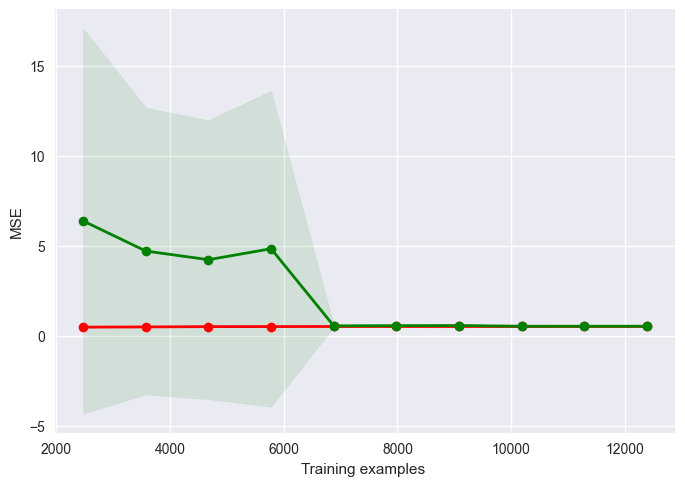

In [89]:
plot_learning_curve(train_sizes, train_scores, test_scores)

Observing that : 

* Both curves have reached a plateau; they are close and fairly high.

* Few instances in the training set means the model can fit them perfectly. But as more instances are added to the training set, it becomes impossible for the model to fit the training data perfectly.

* When the model is trained on very few training instances, it is not able of generalizing properly, which is why the validation error is initially quite high. 

* Then as the model learns on more training examples, the training and validation error reduce slowly.

These learning curves are typical of **underfitting** model.

#### 4D. **Scalability Curve** / Effect of training set size on FIT TIME

We can also study how training scales as the function of number of training samples.

In [136]:
toggle_code()
#@ title [Plot Scalability curves]
def plot_scalability_curve(train_sizes, fit_times):
    train_score_mean = np.mean(-train_scores, axis=1)
    train_score_std = np.std(-train_scores, axis=1)

    test_score_mean = np.mean(-test_scores, axis=1)
    test_score_std = np.std(-test_scores, axis=1)

    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    plt.fill_between(train_sizes,
                    fit_times_mean - fit_times_std,
                    fit_times_mean + fit_times_std,
                    alpha=0.1,
                    color='g',)

    plt.plot(train_sizes, fit_times_mean, "o-", color='b', lw=2)

    plt.xlabel("Training examples ")
    plt.ylabel("fit time")
    # plt.legend(loc="best")
    
    return plt.show()


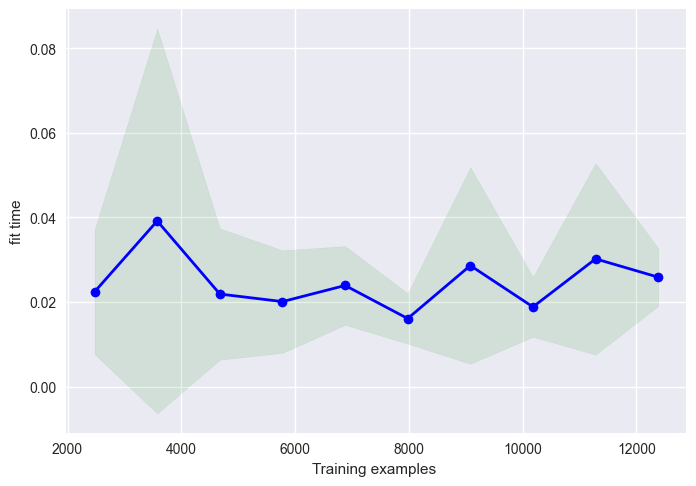

In [91]:
plot_scalability_curve(train_sizes,fit_times)

As the number of training examples grows, the time to fit also increases.

#### 4E. Model Examination

Let's examine the weight vectors and how much variability exists between them across different cross-validated models.

In [92]:
feature_names = train_features.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

For this we will first construct a dataframe of weight vectors and then plot them with `boxplot`.

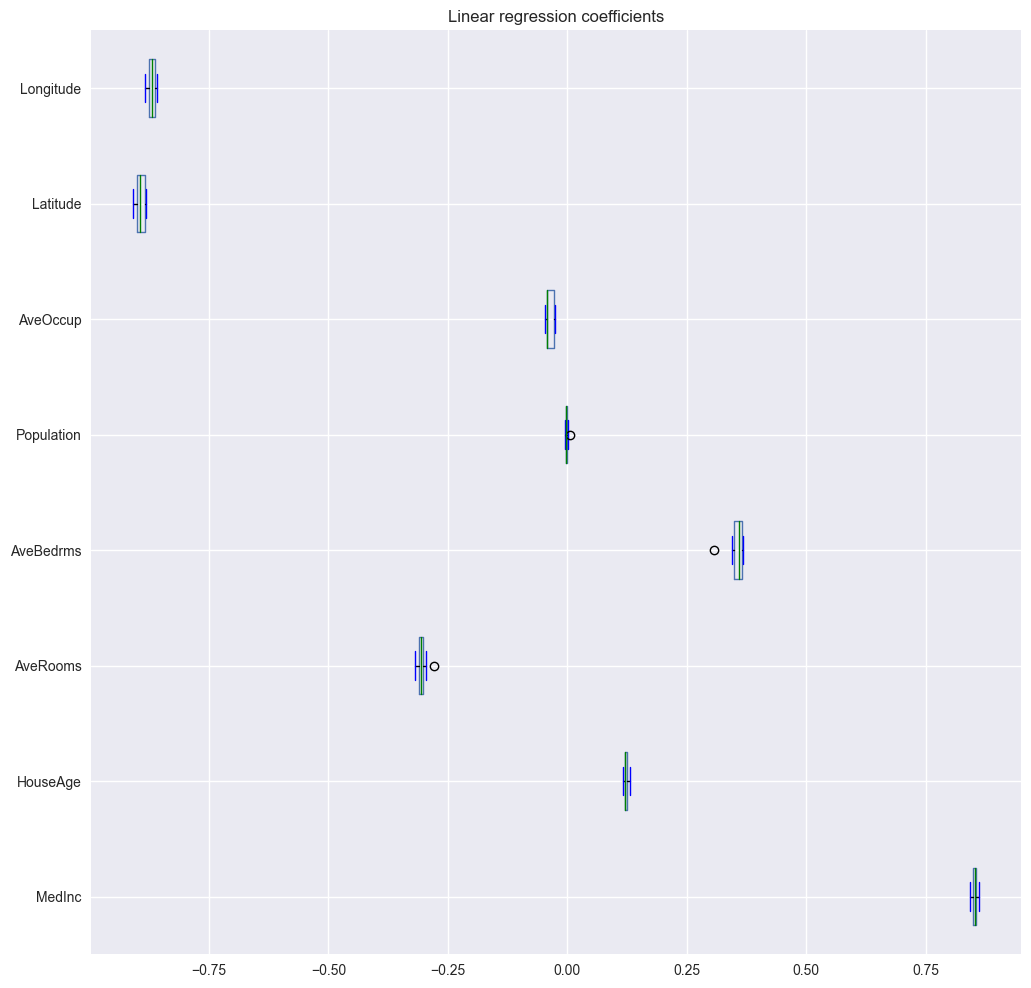

In [93]:
coefs = [i[-1].coef_ for i in lin_reg_cv_results["estimator"]] 
weights_df = pd.DataFrame(coefs, columns=feature_names)

color = {'whiskers':'black','medians':'green','caps':'blue'}
weights_df.plot.box(color=color, vert=False,figsize=(12,12))

plt.title('Linear regression coefficients')
plt.show()

There is not much variability in weights by different models. It can also be seen in the standard deviation of weights as seen in `std` row below

In [94]:
weights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,10.0,0.852153,0.005763,0.843517,0.848871,0.852711,0.854743,0.861659
HouseAge,10.0,0.122770,0.004312,0.117394,0.119895,0.121592,0.125520,0.130560
AveRooms,10.0,-0.304384,0.010998,-0.318971,-0.310778,-0.305795,-0.302980,-0.278426
AveBedrms,10.0,0.353528,0.018044,0.307474,0.349715,0.360139,0.364646,0.367952
Population,10.0,-0.001576,0.003254,-0.005787,-0.002688,-0.002063,-0.000350,0.005297
AveOccup,10.0,-0.037059,0.008582,-0.047584,-0.042486,-0.042325,-0.027562,-0.026331
Latitude,10.0,-0.894011,0.009975,-0.908058,-0.901411,-0.895370,-0.883967,-0.881884
Longitude,10.0,-0.869753,0.009097,-0.884206,-0.876542,-0.869631,-0.862110,-0.857844


#### 4F. Model Selection

Let's select the model with the lowest cross validated test error as the best performance model.

In [95]:
lin_reg_cv_results['estimator']

[Pipeline(steps=[('feature_scaling', StandardScaler()),
                 ('lin_reg', LinearRegression())]),
 Pipeline(steps=[('feature_scaling', StandardScaler()),
                 ('lin_reg', LinearRegression())]),
 Pipeline(steps=[('feature_scaling', StandardScaler()),
                 ('lin_reg', LinearRegression())]),
 Pipeline(steps=[('feature_scaling', StandardScaler()),
                 ('lin_reg', LinearRegression())]),
 Pipeline(steps=[('feature_scaling', StandardScaler()),
                 ('lin_reg', LinearRegression())]),
 Pipeline(steps=[('feature_scaling', StandardScaler()),
                 ('lin_reg', LinearRegression())]),
 Pipeline(steps=[('feature_scaling', StandardScaler()),
                 ('lin_reg', LinearRegression())]),
 Pipeline(steps=[('feature_scaling', StandardScaler()),
                 ('lin_reg', LinearRegression())]),
 Pipeline(steps=[('feature_scaling', StandardScaler()),
                 ('lin_reg', LinearRegression())]),
 Pipeline(steps=[('feature_s

In [96]:
best_model_index = np.argmin(test_error)
selected_model = lin_reg_cv_results['estimator'][best_model_index]

Let's examine the model coefficients and intercepts :

In [97]:
print('Intercept (w_0) :',selected_model['lin_reg'].intercept_)
print()
print('Coefficients (w_1,w_2.....,w_m) : \n',selected_model['lin_reg'].coef_)

Intercept (w_0) : 2.0779898917958657

Coefficients (w_1,w_2.....,w_m) : 
 [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


#### 4G. Model Performance

Towards this, let's first obtain the predictions for test points in cross validation.

In [98]:
from sklearn.model_selection import cross_val_predict

cv_predictions = cross_val_predict(lin_reg_pipeline, train_features, train_labels)

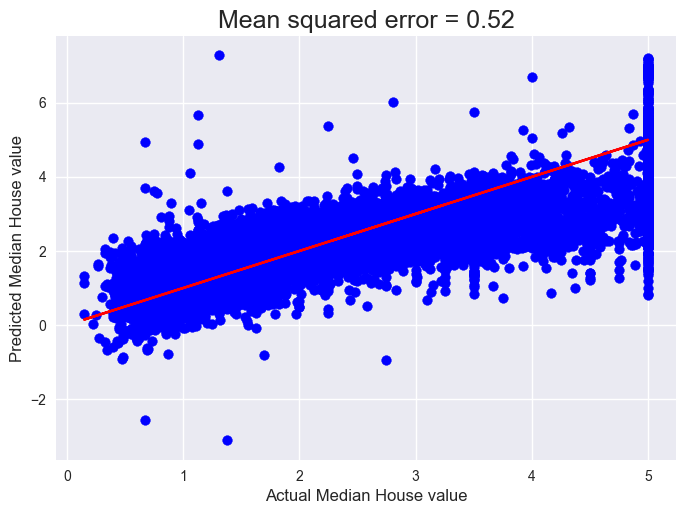

In [99]:
mse_cv = mean_squared_error(train_labels, cv_predictions)

plt.scatter(train_labels, cv_predictions, color='blue')
plt.plot(train_labels, train_labels, 'r-')

plt.title(f'Mean squared error = {mse_cv:.2f}', size=18)
plt.xlabel('Actual Median House value', size=12)
plt.ylabel('Predicted Median House value', size=12)
plt.show()

* The model seems to be all over the place in its predictions for examples with label 5. 

* There are some negative predictions. We can fix this by adding a constraints on the weights to be positive.


At this stage, we should perform error analysis and check where the predictions are going wrong. 

We can revisit feature construction, preprocessing or model stages and make the necessary course corrections to get better performance.

### STEP 5 : **Predictions**

We can use the best performing model from cross validation for getting predictions on the test set.

In [100]:
test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

In [101]:
test_predictions = lin_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

### STEP 6 : **Report Model Performance**

We report the model perfromance on the test set.

In [102]:
score_cv = selected_model.score(test_features, test_labels)
score = lin_reg_pipeline.score(test_features, test_labels)

print('R2 score for the best model obtained via cross validation :', score_cv)
print('R2 score for model w/o cv :', score)

R2 score for the best model obtained via cross validation : 0.5923577635319087
R2 score for model w/o cv : 0.5910509795491351


Alternatively we can use any other metric of interest and report performance based on that. 

For example, the mean squared error is as follows:

In [103]:
mse_cv = mean_squared_error(test_labels, test_predictions_cv)
mse = mean_squared_error(test_labels, test_predictions)

print('MSE for the best model obtained via cross validation :', mse_cv)
print('MSE for model w/o cv : ', mse)

MSE for the best model obtained via cross validation : 0.5393995876218524
MSE for model w/o cv :  0.5411287478470689


#### Testing Model on other metrics 

In [104]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=False, test_size=0.2, random_state=0)

lin_reg_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('lin_reg', LinearRegression())
])

lin_reg_pipeline.fit(X_train, y_train)
test_score = lin_reg_pipeline.score(X_test, y_test)
test_score


0.660514059153199

In [105]:
y_pred = lin_reg_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.7033383507521879

In [106]:
explained_variance_score(y_test, y_pred)

0.6605500501742702

In [107]:
max_error(y_test,y_pred)

7.26045329295842

In [108]:
mean_absolute_error(y_test, y_pred)

0.5168526993787042

In [109]:
mean_squared_error(y_test, y_pred)

0.4946848356388077

### **BASELINE MODELS**

Now, we will build a couple of baseline models using `DummyRegression` and `permutation_test_score`. 

We will compare performance of our linear regression model with these two baselines.

We will use `ShuffleSplit` as a cross validation strategy 

In [110]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

Let's load the data and split it into training and test.

In [111]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels,  random_state=42)

#### 1. Linear Regression Classifier


* Build linear regression model with feature scaling as part of a pipeline.

* Train the model with 10-fold cross validation via ShuffleSplit.

* Capture errors on different folds.

In [112]:
lin_reg_pipeline = Pipeline([
    ('feature scaling', StandardScaler()),
    ('lin_reg', LinearRegression())
])

lin_reg_cv_results = cross_validate(lin_reg_pipeline, train_features,train_labels, cv=shuffle_split_cv, scoring='neg_mean_absolute_error', n_jobs=-1)

lin_reg_error = pd.Series(-lin_reg_cv_results['test_score'],
                           name='Linear regressor error')

lin_reg_cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

#### 2. Dummy Regression Classifier

In [113]:
def dummy_regressor_baseline(strategy, constant_val=None, quantile_val=None):
    baseline_model_median = DummyRegressor(strategy=strategy,
                                            constant=constant_val,
                                            quantile=quantile_val)

    baseline_median_cv_results = cross_validate(
        baseline_model_median, train_features, train_labels, cv=shuffle_split_cv, n_jobs=-1,  scoring='neg_mean_absolute_error')

    return pd.Series(-baseline_median_cv_results['test_score'], name="Dummy regressor error")


In [114]:
baseline_median_cv_results_errors = dummy_regressor_baseline(strategy='median')

baseline_mean_cv_results_errors = dummy_regressor_baseline(strategy='mean')

baseline_constant_cv_results_errors = dummy_regressor_baseline(
    strategy='constant', constant_val=2)

baseline_quantile_cv_results_errors = dummy_regressor_baseline(
    strategy='quantile', quantile_val=0.55)

Let's compare performance of these Dummy Regressors:

In [115]:
dummy_error_df = pd.concat([baseline_median_cv_results_errors,
                            baseline_mean_cv_results_errors,
                            baseline_constant_cv_results_errors,
                            baseline_quantile_cv_results_errors], axis=1)

dummy_error_df.columns = ['Median CV', 'Mean CV', 'Constant CV', 'Quantile CV']
dummy_error_df

,Median CV,Mean CV,Constant CV,Quantile CV
0,0.881187,0.918341,0.902993,0.891847
1,0.873773,0.898484,0.886983,0.877153
2,0.876366,0.894307,0.885488,0.877260
3,0.892083,0.915112,0.904889,0.895924
4,0.876835,0.909209,0.895593,0.884722
5,0.874685,0.903733,0.890999,0.880856
6,0.864097,0.902037,0.886215,0.874646
7,0.888523,0.917216,0.904945,0.894905
8,0.890963,0.921880,0.908874,0.898323
9,0.886765,0.919369,0.905994,0.895436


Plotting erros using `barplot`

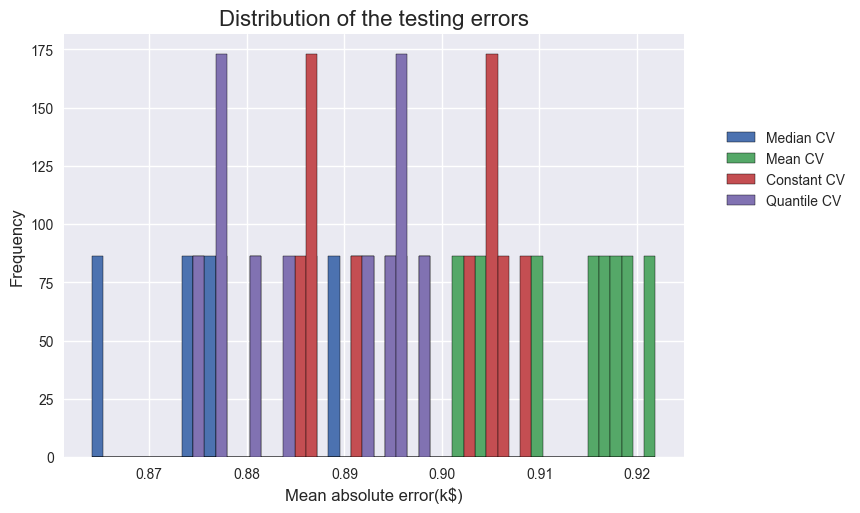

In [116]:
dummy_error_df.plot.hist(bins=50, density=True, edgecolor='black')

plt.legend(bbox_to_anchor=(1.05,0.8), loc='upper left')
plt.xlabel('Mean absolute error(k$)', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Distribution of the testing errors' ,size=16)
plt.show()

#### Permutation_test_score 

It permutes the target to generate randomized data and computes the empirical p-value against the null hypothesis, that features and targets are independent.

Here we are interested in `permutation_score` returned by this API, which indicates score of the model on different permutations.

In [117]:
score, permutation_score, pvalue = permutation_test_score(
    lin_reg_pipeline, train_features, train_labels, cv=shuffle_split_cv, scoring='neg_mean_absolute_error', n_jobs=-1, n_permutations=30)

permutation_errors = pd.Series(-permutation_score, name='Permuted error')

In [118]:
print('Permutation test score :\n', permutation_score)

Permutation test score :
 [-0.91446539 -0.91608713 -0.91501122 -0.91112203 -0.91326112 -0.91428719
 -0.91694297 -0.90660687 -0.90873595 -0.91546138 -0.9084695  -0.91174023
 -0.91857102 -0.91467076 -0.90396709 -0.91239289 -0.91095499 -0.91729623
 -0.90529415 -0.91436609 -0.91993036 -0.91661883 -0.91104746 -0.91563156
 -0.91014294 -0.91526135 -0.90680247 -0.90796435 -0.91032999 -0.91545574]


#### Model Comparision 

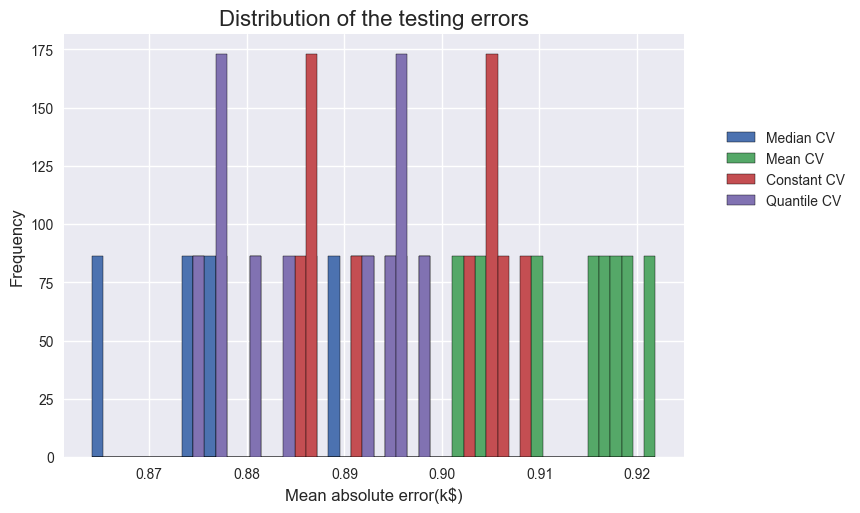

In [119]:
dummy_error_df.plot.hist(bins=50, density=True, edgecolor='black')

plt.legend(bbox_to_anchor=(1.05,0.8), loc='upper left')
plt.xlabel('Mean absolute error(k$)', size=12) 
plt.ylabel('Frequency', size=12)
plt.title('Distribution of the testing errors' ,size=16)
plt.show()

In [120]:
errors_df = pd.concat([lin_reg_error, baseline_median_cv_results_errors,permutation_errors], axis=1)

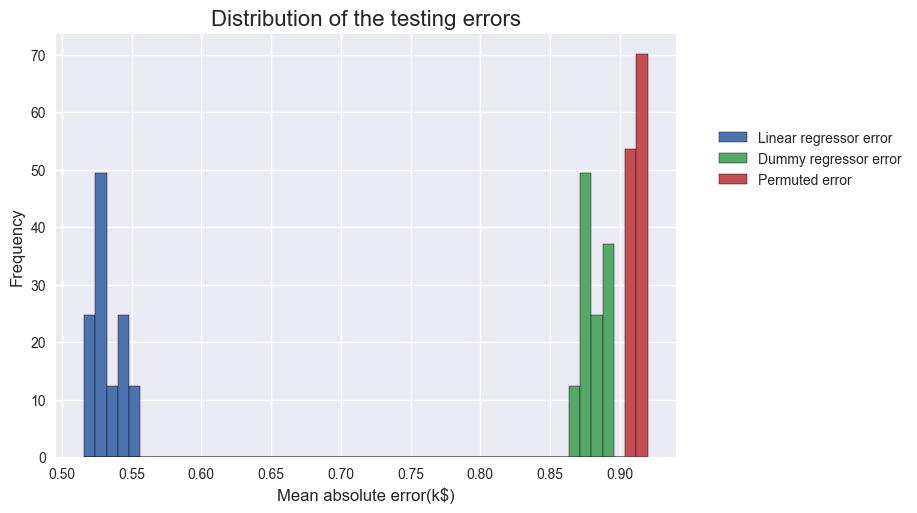

In [121]:
errors_df.plot.hist(bins=50, density=True, edgecolor='black')

plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.xlabel('Mean absolute error(k$)', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Distribution of the testing errors', size=16)
plt.show()


# SGDRegressor Demonstration

### **Linear regression with iterative optimization: SGDRegressor** 

In this notebook, we will build linear regression model, with `SGDRegressor`. 

SGD offers a lot of control over optimization procedure through a number of hyperparameters. However, we need to set them to right values in order to make it work for training the model.

### Importing the libraries

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import permutation_test_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor

In [138]:
np.random.seed(306)
plt.style.use('seaborn')

C:\Users\rahul gupta\AppData\Local\Temp\ipykernel_28096\959965024.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


We will use `ShuffleSplit` as a cross validation strategy.

In [139]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

### STEP 1:  **Load the dataset**

In [140]:
features ,labels = fetch_california_housing(as_frame=True, return_X_y=True)

### STEP 2 :  **Preprocessing**

Split data into training and test sets.

In [141]:
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)

Divide the training data into train and dev sets.

In [161]:
train_features ,dev_features, train_labels, dev_labels = train_test_split(
    com_train_features, com_train_labels, random_state=42)


(3870, 8)

### STEP 3 :  **Model Building**

#### **Baseline SGDRegressor**

* Step 1 : To begin with, we instantiate a baseline `SGDRegressor` model with default parameters.

* Step 2 : Train the model with training feature matrix and labels.

* Step 3 : Obtain the score on the training and dev data.

In [143]:
sgd = SGDRegressor(random_state=42)
sgd.fit(train_features, train_labels) 

train_mae = mean_absolute_error(train_labels, sgd.predict(train_features)) 
dev_mae = mean_absolute_error(dev_labels, sgd.predict(dev_features)) 

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)

Train MAE:  309190327803747.2
Dev MAE:  311959782899622.1


We can observe that the mean absolute error is too high. The baseline model doesn't train well. This may happen due to large learning rate.

Let's investigate this issue by training the model step by step and recording training loss in each step.

#### **Adding a feature scaling step** 

We know that, SGD is sensitive to feature scaling. Let's add a feature scaling step and check if we get better MAE.

In [144]:
sgd_pipeline = Pipeline([
    ('scaler' , StandardScaler()),
    ('sgd' , SGDRegressor())
])

sgd_pipeline.fit(train_features, train_labels) 

train_mae = mean_absolute_error(train_labels, sgd.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd.predict(dev_features))

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)

Train MAE:  309190327803747.2
Dev MAE:  311959782899622.1


The error is still high. 

**Let's run `SGDRegressor` step by step and investigate issues with training :** 

* Step 1 : Instantiate `SGDRegressor`  with `warm_start = True` and `tol=-np.infty`.

* Step 2 : Train SGD step by step and record regression loss in each step.

* Step 3 : Plot learning curves and see if there are any issues in training.

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

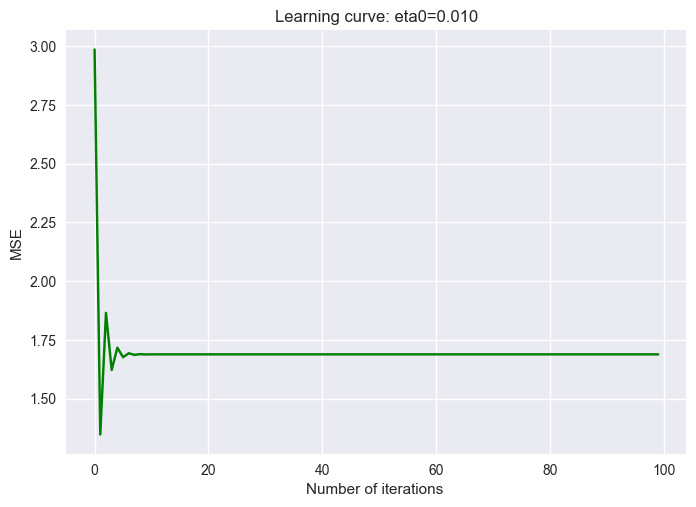

In [147]:
eta0 = 1e-2 
sgd_pipeline = Pipeline([
                        ('scaler', StandardScaler()),
                        ('sgd',SGDRegressor(max_iter=1, tol = 0, warm_start=True, random_state=42))
])

loss = [] 

for epoch in range(100):
    sgd_pipeline.fit(train_features, train_labels) #continues where it left off 
    loss.append(mean_squared_error(train_labels, sgd_pipeline.predict(train_features))) 

plt.plot(np.arange(len(loss)), loss, 'g-')

plt.xlabel('Number of iterations ')
plt.ylabel('MSE')
plt.title(f'Learning curve: eta0={eta0:.3f}')
plt.show()

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

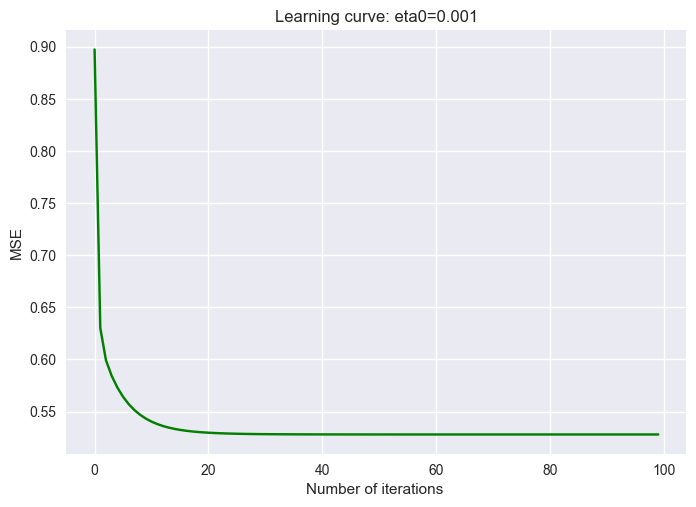

In [149]:
eta0 = 1e-3
sgd_pipeline = Pipeline([
                        ('feature_scaling', StandardScaler()),
                        ('sgd',SGDRegressor(max_iter=1, tol = 0, warm_start=True, eta0=eta0,random_state=42))
])

loss = [] 

for epoch in range(100):
    sgd_pipeline.fit(train_features, train_labels) 
    loss.append(mean_squared_error(train_labels, sgd_pipeline.predict(train_features))) 

plt.plot(np.arange(len(loss)), loss, 'g-')

plt.xlabel('Number of iterations ')
plt.ylabel('MSE')
plt.title(f'Learning curve: eta0={eta0:.3f}')
plt.show()

The is an ideal learning curve where the train loss reduces monotonically as the training progresses.

In [150]:
print("Number of iteration before reaching convergence criteria :",sgd_pipeline[-1].n_iter_)

print("Number of weight updates : ", sgd_pipeline[-1].t_)

Number of iteration before reaching convergence criteria : 1
Number of weight updates :  11611.0


**Checking train and dev mean absolute error.**

In [151]:
train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)

Train MAE:  0.5333732983042573
Dev MAE:  0.5190150280908042


#### **Fixing learning rate through validation curves**


* Step 1 : Provide the list of values to be tried for a hyperparameter.

* Step 2 : Instantiate an object of `validation_curve` with estimator, training features and label. Set `scoring` parameter to relevant score.

* Step 3 : Convert scores to error. 

* Step 4 : Plot validation curve with the value of hyper-parameter on x-axis and error on the y-axis

* Step 5 : Fix the hyper-parameter value where the test error is the least.

In [152]:
%%time
eta0 = [1e-5, 1e-4, 1e-3, 1e-2]

train_scores, test_scores = validation_curve(
    sgd_pipeline, com_train_features, com_train_labels, param_name="sgd__eta0", param_range=eta0, cv=shuffle_split_cv, scoring='neg_mean_squared_error', n_jobs=2
)

CPU times: total: 31.2 ms
Wall time: 4.07 s


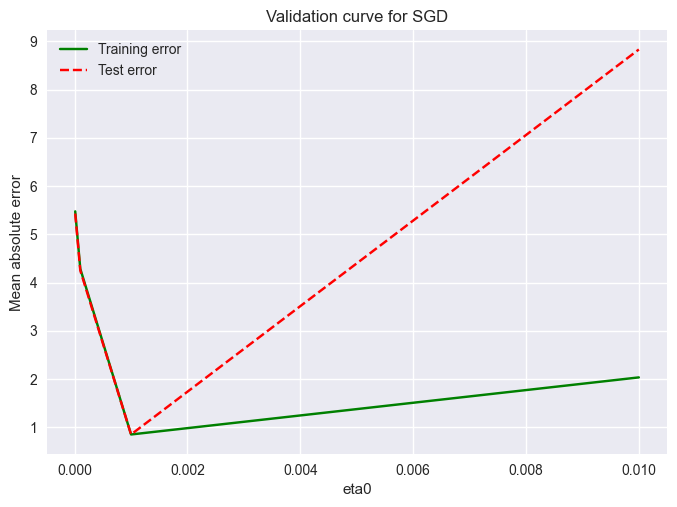

In [153]:
train_errors, test_errors = -train_scores, -test_scores

plt.plot(eta0, train_errors.mean(axis=1),'g-x',label='Training error')
plt.plot(eta0, test_errors.mean(axis=1),'r--x', label='Test error')

plt.legend() 
plt.xlabel('eta0')
plt.ylabel('Mean absolute error')
plt.title('Validation curve for SGD')
plt.show()

For `eta0=1e-3`, the test error is the least and hence we select that value as the value for `eta0`. 

Next we also plot standard deviation in errors.

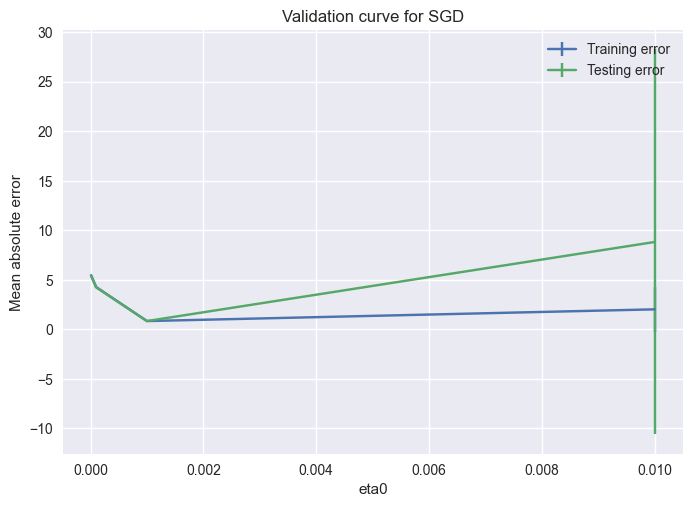

In [154]:
plt.errorbar(eta0, train_errors.mean(axis=1), yerr=train_errors.std(axis=1), label='Training error')

plt.errorbar(eta0, test_errors.mean(axis=1),yerr=test_errors.std(axis=1), label='Testing error')

plt.legend(loc='best') 
plt.xlabel('eta0')
plt.ylabel('Mean absolute error')
plt.title('Validation curve for SGD')
plt.show()

#### **Experimenting with learning rate parameter**

##### 1. No learning rate parameter

In [155]:
sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=500,
                        early_stopping=True,
                        eta0=1e-3,
                        tol=1e-3,
                        validation_fraction=0.2,
                        n_iter_no_change=5,
                        average=10,
                        random_state=42))
])

sgd_pipeline.fit(train_features, train_labels)

train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))

dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)
print()

# development set dev set
print('Number of SGD iterations :', sgd_pipeline[-1].n_iter_)
print('Number of weight updates : ', sgd_pipeline[-1].t_)

Train MAE:  0.5433287489797834
Dev MAE:  0.5345612073911922

Number of SGD iterations : 35
Number of weight updates :  406351.0


##### 2. learning rate = 'constant'

In [156]:
sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=500,
                         early_stopping=True,
                         eta0=1e-3,
                         tol=1e-3,
                         learning_rate= 'constant',
                         validation_fraction=0.2,
                         n_iter_no_change=5,
                         average=10,
                         random_state=42))
])

sgd_pipeline.fit(train_features, train_labels)

train_mae = mean_absolute_error(
    train_labels, sgd_pipeline.predict(train_features))

dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)
print()

# development set dev set
print('Number of SGD iterations :', sgd_pipeline[-1].n_iter_)
print('Number of weight updates : ', sgd_pipeline[-1].t_)


Train MAE:  0.5528203432984674
Dev MAE:  0.5689568216133667

Number of SGD iterations : 11
Number of weight updates :  127711.0


##### 3. learning rate = 'adaptive'

In [157]:
sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=500,
                         early_stopping=True,
                         eta0=1e-3,
                         tol=1e-3,
                         learning_rate='adaptive',
                         validation_fraction=0.2,
                         n_iter_no_change=5,
                         average=10,
                         random_state=42))
])

sgd_pipeline.fit(train_features, train_labels)

train_mae = mean_absolute_error(
    train_labels, sgd_pipeline.predict(train_features))

dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)
print()

# development set dev set
print('Number of SGD iterations :', sgd_pipeline[-1].n_iter_)
print('Number of weight updates : ', sgd_pipeline[-1].t_)


Train MAE:  0.5375525445454805
Dev MAE:  0.5200254740759911

Number of SGD iterations : 40
Number of weight updates :  464401.0


#### **Setting `max_iters` parameter**

In [158]:
max_iter = np.ceil(1e6/com_train_features.shape[0])
max_iter

65.0

In [160]:
sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=int(max_iter),
                         early_stopping=True,
                         eta0=1e-3,
                         tol=1e-3,
                         learning_rate='adaptive',
                         validation_fraction=0.2,
                         n_iter_no_change=5,
                         average=10,
                         random_state=42))
])

sgd_pipeline.fit(train_features, train_labels)

train_mae = mean_absolute_error(
    train_labels, sgd_pipeline.predict(train_features))

dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)
print()

# development set dev set
print('Number of SGD iterations :', sgd_pipeline[-1].n_iter_)
print('Number of weight updates : ', sgd_pipeline[-1].t_)

Train MAE:  0.5375525445454805
Dev MAE:  0.5200254740759911

Number of SGD iterations : 40
Number of weight updates :  464401.0


### SUMMARY : 

In this notebook, we saw:

* how to build `SGDRegressor` model.

* how to tune the learning rate.

* how to use different `learning_rates` and their impact on convergence.

* how to use early stopping and averaged SGD

* how to tune hyper-parameters using `validation_curves`.